In [1]:
import numpy as np                                     
import matplotlib.pyplot as plt                      
import pandas as pd

from Functions_Load_smooth_data import *
from Functions_for_Data_Analysis import *
from Functions_for_Plots import *
from Functions_for_plot_style import *
plt.rcParams["font.family"] = "Arial"

# Load and smooth the p53 traces

In [2]:
file_path="Input_files/"
file_out_path = "Output_files/"
fig_path = "Figures/"
parameters = pd.read_csv(file_path+"Parameters.csv",index_col=0, delimiter=',',header=0)

dataset_dict = []
titles = parameters["filename"].tolist()
for n in np.arange(0,len(titles),1): #### Choose external frequency   
    # Load the data
    matrix_of_traces = np.array(pd.read_csv(file_path+"p53_from"+titles[n]+".txt", delimiter=',',header=None))
    for cell in range(matrix_of_traces.shape[0]):
        dataset_dict.append(
            {"filename": titles[n],
             "cell_id": cell, 
             "p53_trace":matrix_of_traces[cell,:]}
        )

In [3]:
# Creates the pandas dataframe and merges with the parameters of the experiment
dataset = pd.DataFrame(dataset_dict)                                        
dataset = pd.merge(dataset,parameters, on = ["filename"], how = 'left')     

# Splits the dataset in three zones (before, during and after nutlin pulses), find the position of the nutlin pulses from the parameters of the experiments and define the nutlin square wave for the plots
dataset = dataset.apply(split_trajectories_in_3_zones,axis=1)
dataset = dataset.apply(compute_position_nutlin_pulses, axis=1)
dataset = dataset.apply(compute_nutlin_square_signal,axis = 1)

# Smoothing and filtering of the data
dataset = dataset.apply(subtract_poly_fit, axis=1)
dataset = dataset.apply(smooth_filter_median, axis = 1)
dataset = dataset.apply(smooth_filter_polyn, axis = 1)

# Saves the dataset in .pkl file
dataset.to_pickle(file_out_path+"Dataset.pkl")

## Data analysis

In [3]:
dataset = pd.read_pickle(file_out_path+"Dataset.pkl")

# Compute the position of the p53 peaks, the peak-to-peak-distance and classify the entrainment type
dataset = dataset.apply(compute_peaks, axis = 1)
dataset = dataset.apply(compute_peak_to_peak_distance, axis = 1)
dataset = dataset.apply(find_entrainment_type,axis=1)

# Group the dataset by entrain label: "Entrained", "Period-doubling", "Mode-hopping", "Unclassified"
dataset_grouped_by_entrain_label = group_df(dataset, "entrain_label")
dataset_grouped_by_entrain_label = dataset_grouped_by_entrain_label[["Entrained", 
                                                                   "Period-doubling",
                                                                   "Mode-hopping",
                                                                     "Unclassified"]]# This reorders the columns

# Group the dataset by entrain mode: "Non-Entrained", "1:2", "1:1", "2:1", "3:2"
dataset_grouped_by_entrain_mode = group_df(dataset,"entrain_mode")

In [4]:
# Find couple of traces that have same initial behaviour for chaos
rows_cols_unique = find_traces_that_start_together(dataset, 
                                nut_period = 11,
                                nut_conc = 0.5,
                                entrain_label = "Unclassified",
                                entrain_mode = "Non-entrained", 
                                num_traces_to_find = 30, 
                                initial_points_to_compare = 10)

# Plots

## Figure 3E-F and 4C-D: Histograms of entrain label and mode

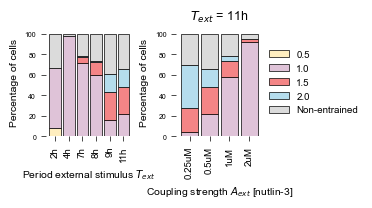

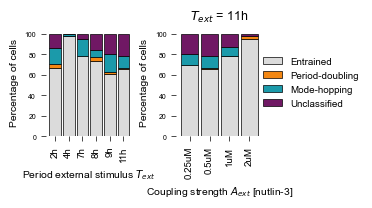

In [5]:
# Makes the histograms
make_histo(dataset_grouped_by_entrain_mode,
           color_list =  ["#FFEEBF","#DFC3D8","#F48586", "#B5DDED","#DBDBDB"],
          filename_tosave = fig_path+"Histo_entrain_mode")
make_histo(dataset_grouped_by_entrain_label,
           color_list = ["#DBDBDB","#F38713","#1B9AAA","#701864"],
          filename_tosave =fig_path+"Histo_entrain_label")

## Fig 4A: Mode-hopping traces

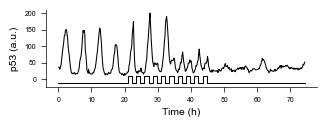

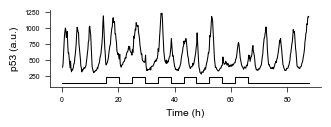

In [6]:
plot_mode_hopping_trace(dataset,
                        cell_id = 130,
                        nutlin_period = 2.5,
                        nutlin_concentration = 0.5,
                        offset_nut_pulses_in_plot = -10,
                        figure_path = fig_path)

plot_mode_hopping_trace(dataset,
                        cell_id = 135,
                        nutlin_period = 9.17,
                        nutlin_concentration = 0.5,
                        offset_nut_pulses_in_plot = +0.6,
                        figure_path = fig_path)

## Fig 4B: Period-doubling traces

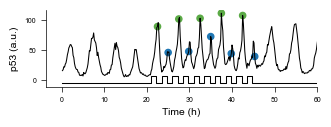

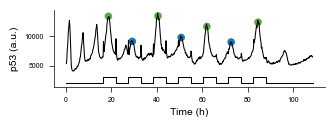

In [7]:
plot_period_doubling_trace(dataset,
                            cell_id = 5,
                            nutlin_period = 2.5,
                            nutlin_concentration = 0.5,
                            offset_nut_pulses_in_plot = -5,
                            xlim_right = 60,
                            figure_path = fig_path)

plot_period_doubling_trace(dataset,
                            cell_id = 170,
                            nutlin_period = 11,
                            nutlin_concentration = 0.5,
                            offset_nut_pulses_in_plot = +2000,
                            xlim_right = None,
                            figure_path = fig_path)




## Fig 4E-F: Histograms of unclassified vs entrained

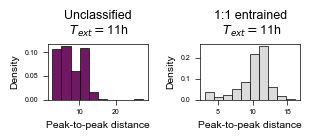

In [8]:
# Compares the peak-to-peak distance distribution of cells in the unclassified fraction vs 1:1 entrain mode
make_histo_periods_entrained_vs_unclassified(dataset, nut_period=11, nut_conc=0.5, entrain_mode= "1.0", figure_path = fig_path)

## Fig 4G: Chaotic traces

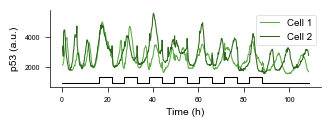

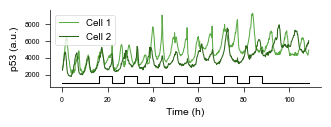

In [9]:
plot_chaos_traces(dataset,
                cell_ids = [12,20],
                nutlin_period = 11,
                nutlin_concentration = 0.5,
                offset_nut_pulses_in_plot = 0.7,
                figure_path = fig_path)

plot_chaos_traces(dataset,
                cell_ids = [80,143],
                nutlin_period = 11,
                nutlin_concentration = 0.5,
                offset_nut_pulses_in_plot = 0.7,
                figure_path = fig_path)